# Datasets

Open3D-ML provides many popular datasets out of the box. In this tutorial, we will see how to use them.

## Available datasets

You may use any dataset available in the `ml3d.datasets` namespace. Some datasets available in the namespace are: `Argoverse`, `InferenceDummySplit`, `KITTI`, `Lyft`, `MatterportObjects`, `NuScenes`, `ParisLille3D`, `S3DIS`, `Scannet`, `SemSegRandomSampler`, `SemSegSpatiallyRegularSampler`, `Semantic3D`, `SemanticKITTI`, `ShapeNet`, `SunRGBD`, `Toronto3D`, `Custom3D` and `Waymo`.
 
 For this example, we will use the `SemanticKITTI` dataset. 
 
<div class="alert alert-info">
    **Note:** Config file parameters may vary for each dataset.
</div>

## Point cloud dataset

**Point cloud:** A point cloud is a collection of points in 3D space. Every point point in point cloud may has multiple features associated with it. An individual point in point cloud has `(x, y, z)` values to indicate it's position in 3D space for x-axis, y-axis and z-axis respectively. And it may / may not have features associated with it; Most common features associalted with individual points are `(r, g, b, i)` values indicating red color, blue color, green color and intensity measure respectively.

There are no hard and fast rules to decide what values go into features.
Datasets may instead use **r** (lidar reflectance) as feature, or no features at all.

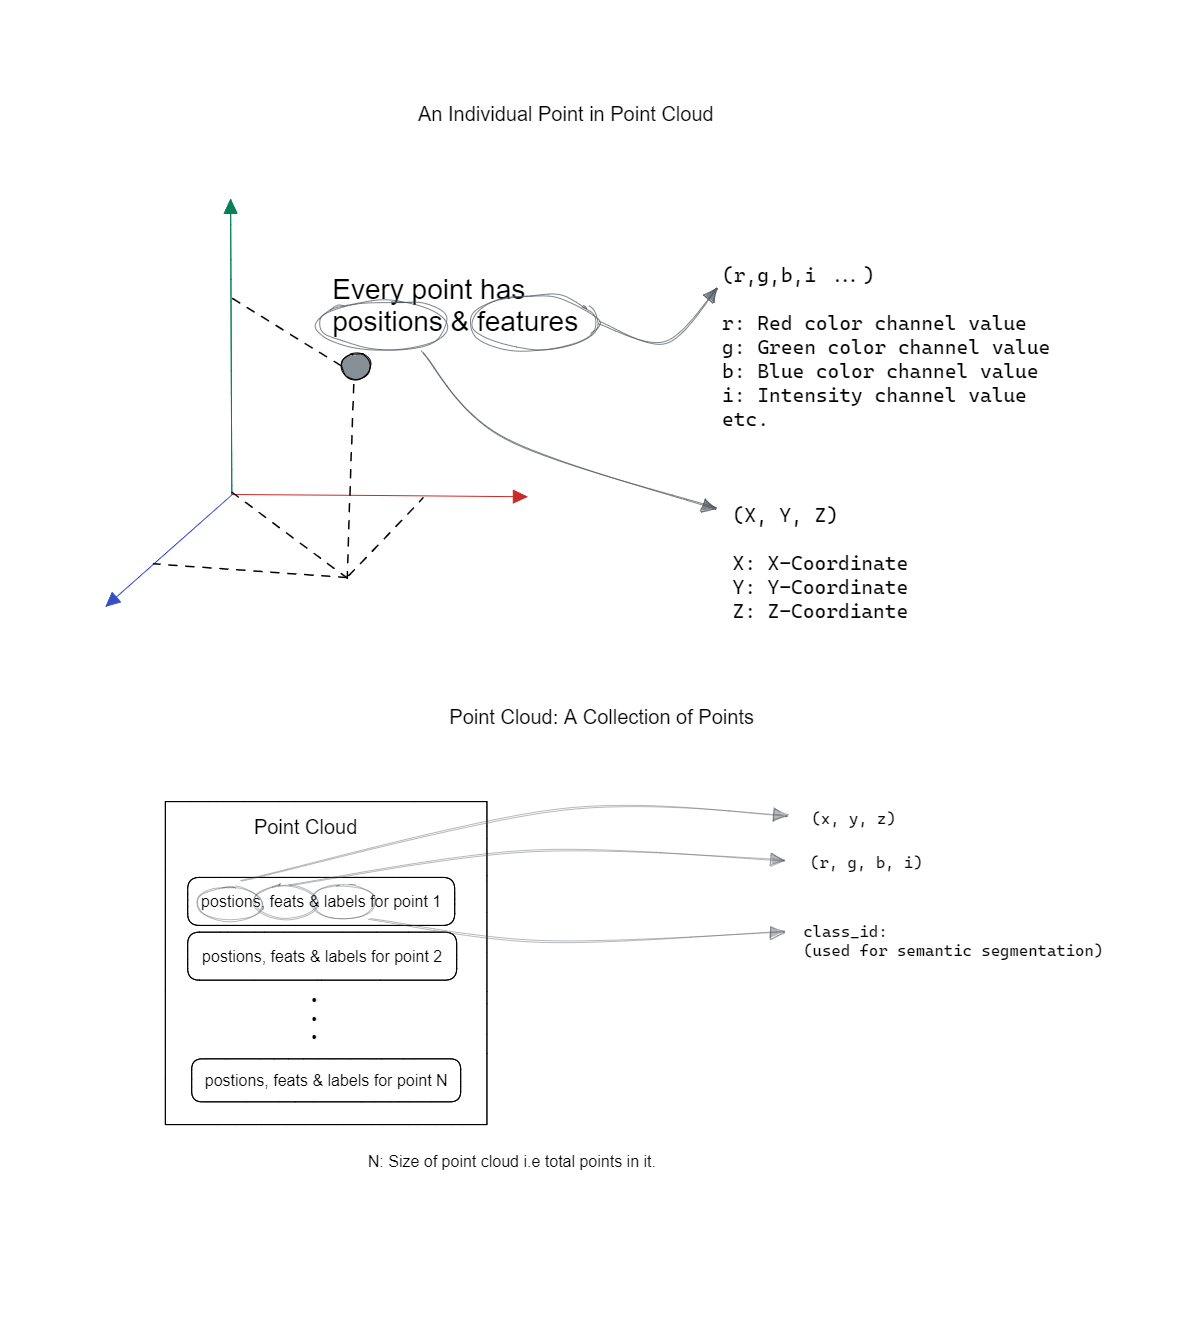

Generally speaking, a dataset is a collection of train, validation and test splits where each split has multiple point clouds within them. Model interacts and learns from train and validation point clouds during training phase but never interacts with test point clouds. Test point clouds are considered as out of bag samples and used during evaluation phase only.

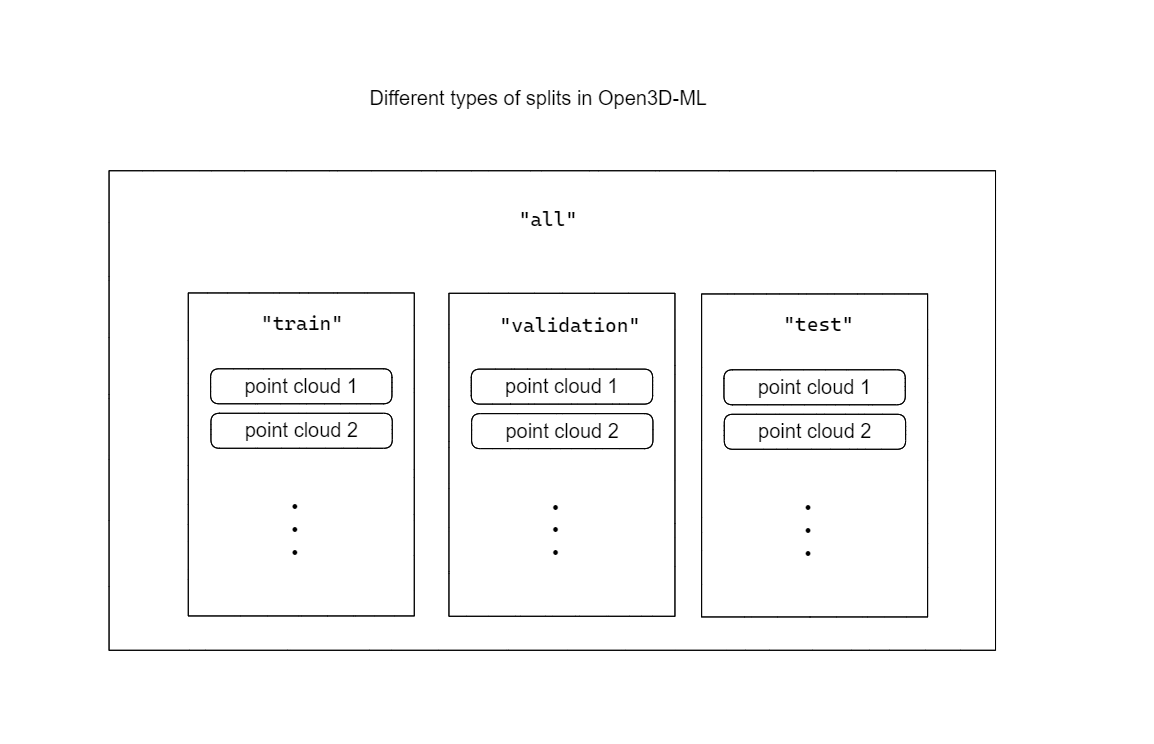

A dataset is partitioned into train(ing), valid(ation) and test(ing) splits. Models use data from the training split to update network weights and performance is measured on the validation split. Hyperparameters can be adjusted to optimize performance on the validation split. The test split is never used during the training step and is only used to report the final performance.

Always make sure that no two point cloud splits share a common point cloud file! This may cause [data leakage](https://en.wikipedia.org/wiki/Leakage_(machine_learning)).

<div class="alert alert-info">
    **Note:** Datasets are built using <a href="https://github.com/isl-org/Open3D-ML/blob/f424215be133b8c2571e66bbab8fc5c4f2aaa931/ml3d/datasets/base_dataset.py#L12-L100">`BaseDataset`</a>
</div>

## SemanticKITTI dataset

The points (positions & features), point clouds & splits are essential components of any dataset. Point cloud files can be stored on disk in many possible ways in multiple formats; **To parse them, we need dataset-specific classes**. One such class is `ml3d.datasets.SemanticKITTI` which parses [SemanticKITTI dataset](http://www.semantic-kitti.org/dataset.html).

You may download the dataset by running script available at [scripts/download_datasets/download_semantickitti.sh](https://github.com/isl-org/Open3D-ML/blob/master/scripts/download_datasets/download_semantickitti.sh).

The dataset is organised as shown in this picture below:

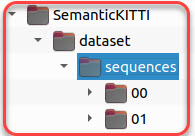

Here, the sequence folders `00` and `01` contain point clouds. To read them we use `ml3d.datasets.SemanticKITTI` (More information available in [API docs](http://www.open3d.org/docs/release/python_api/open3d.ml.torch.datasets.SemanticKITTI.html)).

In [1]:
import open3d.ml.torch as ml3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.

--------------------------------------------------------------------------------

 Using the Open3D PyTorch ops with CUDA 11 may have stability issues!

 We recommend to compile PyTorch from source with compile flags
   '-Xcompiler -fno-gnu-unique'

 or use the PyTorch wheels at
   https://github.com/isl-org/open3d_downloads/releases/tag/torch1.8.2


 Ignore this message if PyTorch has been compiled with the aforementioned
 flags.

 See https://github.com/isl-org/Open3D/issues/3324 and
 https://github.com/pytorch/pytorch/issues/52663 for more information on this
 problem.

--------------------------------------------------------------------------------



In [2]:
# Read a dataset by specifying the path. We are also providing the cache directory and splits.
dataset = ml3d.datasets.SemanticKITTI(dataset_path='SemanticKITTI/',
                                      cache_dir='./logs/cache',
                                      training_split=['00'],
                                      validation_split=['01'],
                                      test_split=['02'])

Here you may notice that point clouds of sequences mentioned in `training_split`, `validation_split` and `test_split` go into their respective split group. The three different split parameter variables instruct Open3D-ML subsystem to reference the following folder locations:

- `training_split=['00']` points to `'SemanticKITTI/dataset/sequences/00/'`
- `validation_split=['01']` points to `'SemanticKITTI/dataset/sequences/01/'`
- `test_split=['02']` points to `'SemanticKITTI/dataset/sequences/02/'`


## Accessing splits

Any split can be accessed using `dataset.get_split(split_name)` method where `split_name` can take any of the valued given below:

- `training`: Returns train data split.
- `validation`: Returns validation data split.
- `test`: Returns test data split.
- `all`: Returs entire dataset by combining all three splits above.

Access train data split:

In [3]:
train_split = dataset.get_split('training')

FileNotFoundError: [Errno 2] No such file or directory: 'SemanticKITTI/dataset/sequences/00/velodyne'

Access validation data split:

In [ ]:
val_split = dataset.get_split('validation')

Access test data split:

In [ ]:
test_split = dataset.get_split('test')

Access all the splits:

In [ ]:
all_split = dataset.get_split('all')

Check the number of point clouds in each split:

In [ ]:
print(len(train_split))
print(len(val_split))
print(len(test_split))
print(len(all_split))

These are same as number of point clouds present in their respective sequence directories.

<div class="alert alert-info">
    **Note:** The returned split objects are built using <a href="https://github.com/isl-org/Open3D-ML/blob/f424215be133b8c2571e66bbab8fc5c4f2aaa931/ml3d/datasets/base_dataset.py#L103-L148">`BaseDatasetSplit`</a>
</div>

### Point clouds within splits

There are three important methods available for split objects.

1. `__len__`: Returns total length i.e number of point clouds available in the split. This also is an upper limit for indices to be passed into `get_attr` and `get_data` methods.

2. `get_attr`: Takes integer ID between `0` and `len(split)` (exclusive) as input and returns metadata (e.g. name, point cloud file path, split etc.) associated with the specific point cloud. Each integer ID is associated with a unique point cloud in the split.

3. `get_data`: Takes integer ID between `0` and `len(split)` (exclusive) as input and returns point positions, features and labels associated with the specific point cloud. Each integer ID is associated with a unique point cloud in the split.

Let us probe `validation` split as an example.

Maximum integer ID possible for `get_attr` and `get_data` can be calculated using `len(split)-1`.

Now, let us have a look at attributes i.e metadata associated with point cloud present at ID `0`:

In [ ]:
# Dictionary containing information about the data e.g. name, path, split, etc.
attr = val_split.get_attr(0)

print(attr.keys())

Atttributes returned are: `'idx'`(index ID), `'name'` (name of point cloud file), `'path'` (path of point cloud file), and `'split'` (split name of point cloud file).

Now, let us also have a look at actual point cloud data at ID `0`:

In [ ]:
data = train_split.get_data(0)  # Dictionary of `point`, `feat`, and `label`
print(data.keys())

- The **`'point'`** key value contains a set of 3D point coordinates - X, Y, and Z:

- The **`'feat'`** (features) key value contains RGB color information for each of the above points.

- The **`'label'`** key value represents which class the dataset content belongs to, i.e.: *pedestrian, vehicle, traffic light*, etc.


In [ ]:
#support of Open3d-ML visualizer in Jupyter Notebooks is in progress
#view the frames using the visualizer
#vis = ml3d.vis.Visualizer()
#vis.visualize_dataset(dataset, 'training',indices=range(len(train_split)))